## Pair programming Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la siguiente url.

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

        "coche": Nombres de los coches.

        "precio_rebajado": Precios rebajados.

        "precio_original": Precios originales.

        "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. El DataFrame debe tener un aspecto parecido a este:

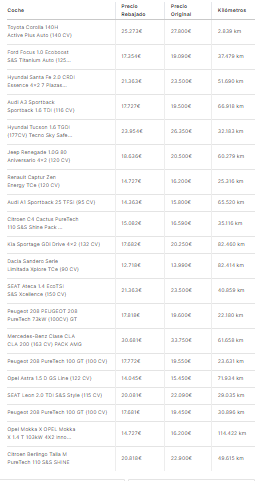